# Learning a function from a formula

## Problem setup

We will solve a simple function approximation problem from a formula:

$$
f(x) = x * \sin(5x)
$$

## Implementation

This description goes through the implementation of a solver for the above function step-by-step.

First, Import the necessary library used for this project:

In [1]:
import brainstate as bst
import brainunit as u

from deepxde import pinnx

We begin by defining a simple function which will be approximated.

In [2]:
def func(x):
    return {'y': x['x'] * u.math.sin(5 * x['x'])}

The argument `x` to `func` is the network input. The `func` simply returns the corresponding function values from the given `x`.

Then, we define a computational domain. We can use a built-in class `Interval` as follows:

In [3]:
geom = pinnx.geometry.Interval('x', -1, 1)

Next, we choose a fully connected neural network of depth 4 (i.e., 3 hidden layers) and width 20 with tanh as the activation function and Lecun uniform as the initializer:

In [4]:
net = pinnx.nn.Model(
    pinnx.nn.DictToArray(x=None),
    pinnx.nn.FNN([1] + [20] * 3 + [1], "tanh", bst.init.LecunUniform()),
    pinnx.nn.ArrayToDict(y=None),
)

Now, we need to define the problem using a built-in class `Function`

In [5]:
num_train = 160
num_test = 100
data = pinnx.problem.Function(
    geom, func, num_train, num_test,
    approximator=net
)

Now, we have the function approximation problem and the network. We bulid a `Model` and choose the optimizer `adam` and the learning rate of `0.001`:

In [6]:
trainer = pinnx.Trainer(data)
trainer.compile(bst.optim.Adam(0.001), metrics=["l2 relative error"]).train(iterations=10000)

Compiling trainer...
'compile' took 0.039280 s

Training trainer...

Step      Train loss                                       Test loss                                        Test metric                                      
0         {'y': Array(0.50319064, dtype=float32)}          {'y': Array(0.50675416, dtype=float32)}          [{'y': Array(1.557643, dtype=float32)}]          
1000      {'y': Array(0.00052569, dtype=float32)}          {'y': Array(0.00056783, dtype=float32)}          [{'y': Array(0.05214092, dtype=float32)}]        
2000      {'y': Array(0.00025324, dtype=float32)}          {'y': Array(0.00028237, dtype=float32)}          [{'y': Array(0.03676897, dtype=float32)}]        
3000      {'y': Array(0.00018571, dtype=float32)}          {'y': Array(0.00020733, dtype=float32)}          [{'y': Array(0.03150658, dtype=float32)}]        
4000      {'y': Array(0.00013415, dtype=float32)}          {'y': Array(0.00015057, dtype=float32)}          [{'y': Array(0.0268493, dtype=flo

We also save and plot the best trained result and loss history.

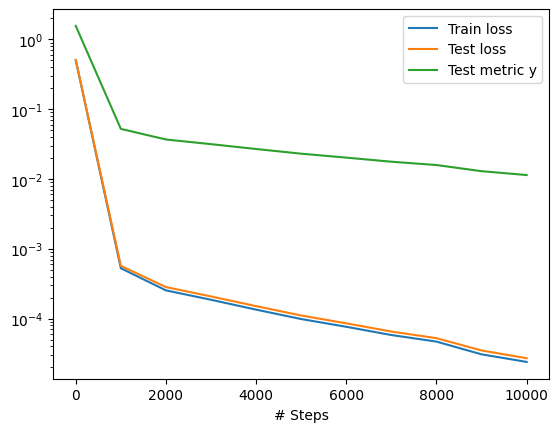

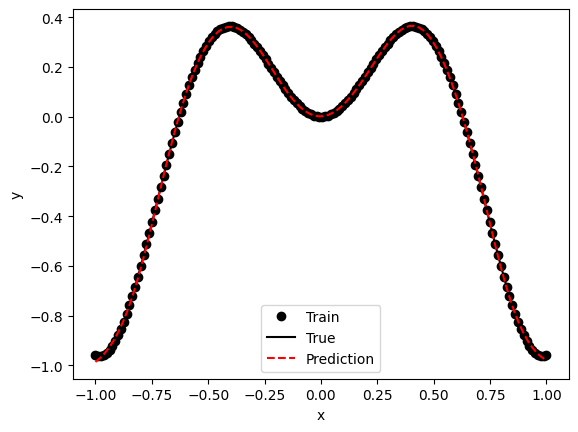

In [7]:
trainer.saveplot(issave=False, isplot=True)